In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import json

"""
Authot: Josue N Rivera

Larp implementation
"""

import larp

In [2]:
# Parameters
size = 120.0
boundaries = [0.2, 0.4, 0.6, 0.8]

In [3]:
with open("scenes\surrounded.rgj") as file:
        rgjs:list = json.load(file)
    
field = larp.PotentialField(size=(size, size), rgjs=rgjs, center_point=[45, 45])
quad_tree = larp.quad.QuadTree(field, minimum_sector_length=0.5, maximum_sector_length=5, boundaries=boundaries)
quad_tree.build()
routing_graph = larp.graph.RouteGraph(quad_tree=quad_tree, build_graph=True)

display = field.to_image(resolution=400)

In [4]:
start = (0, 25) # (x, y)
end = (62, 25)

route = routing_graph.find_route(start, end, scale_tranform=lambda x: 1/(1.0 - x + 1e-10), alg="A*")
# route = routing_graph.find_route(start, end, scale_tranform=lambda x: x + 1, alg="A*")
print(f"Route found: {route is not None}")

Route found: True


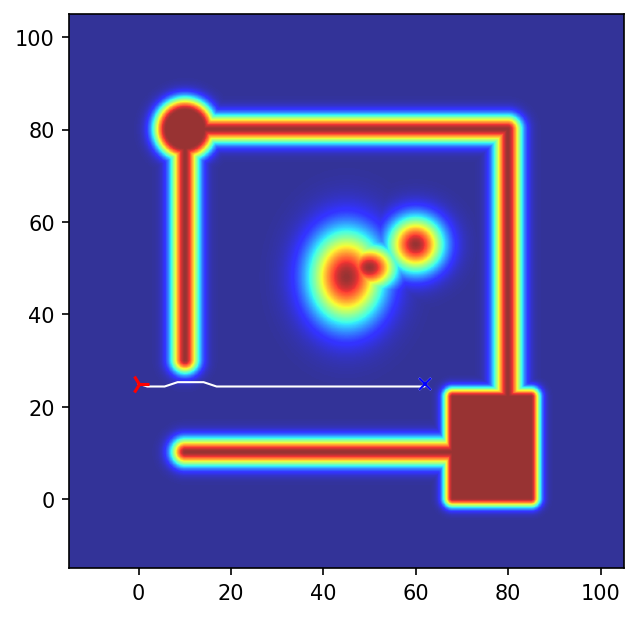

In [5]:
route_path = larp.graph.RouteGraph.route_to_lines_collection(start, end, route, remapped=True)

plt.figure(dpi=150)
plt.imshow(display, cmap='jet', extent=field.get_extent(), alpha=0.8)
plt.plot(route_path[:, 0], route_path[:, 1], color="#fff", alpha=1.0, linewidth=1.0)
plt.plot(route_path[0, 0], route_path[0, 1], 'r4', markersize=10.0, markeredgewidth=1.5)
plt.plot(route_path[-1, 0], route_path[-1, 1], 'wx')
plt.plot(end[0], end[1], 'bx')
plt.show()

In [6]:
# Highest potential value
highest = field.eval(larp.interpolate_along_route(route_path, step=1e-4)).max()
print(f"Highest potential: {highest}")

# Distance traveled
dist = larp.route_distance(route_path)
print(f"Distance traveled: {dist}")

# Area under route
area = field.estimate_route_area(route_path, step=1e-4)
print(f"Total area under route: {area}")

# Average area under route
avg_area = area/dist
print(f"Average area under route: {avg_area}")

# Area under route (scaled to infinity via 1/(x-1))
area = field.estimate_route_area(route_path, step=1e-4, scale_transform=lambda x: 1/(1.0 - x + 1e-10)-1)
print(f"Total area under route (scaled): {area}")

# Average area under route (scaled to infinity via 1/(x-1))
avg_area = area/dist
print(f"Average area under route (scaled): {avg_area}")

Highest potential: 0.08703836763984277
Distance traveled: 62.91807158962005
Total area under route: 0.4836741241073543
Average area under route: 0.007687364089320702
Total area under route (scaled): 0.5129631486189705
Average area under route (scaled): 0.008152874613906586


Route found: True


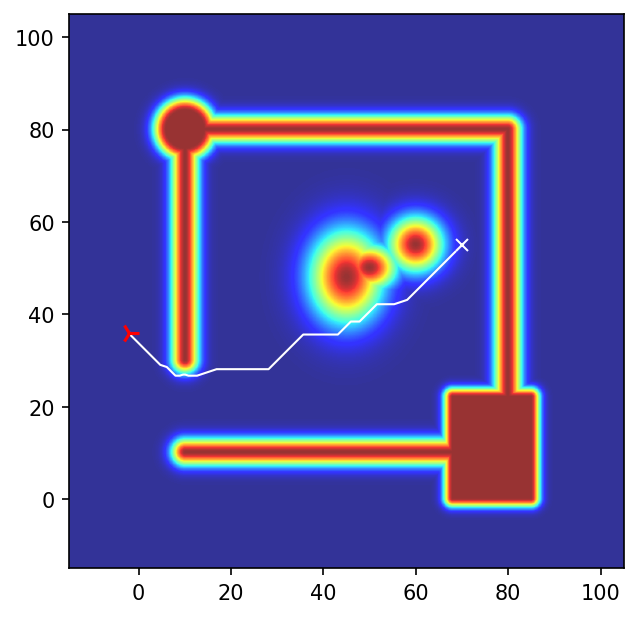

Highest potential: 0.3952846646819338
Distance traveled: 87.92523296300688
Total area under route: 10.931542877107502
Average area under route: 0.12432771013193417
Total area under route (scaled): 14.925361157563419
Average area under route (scaled): 0.16975060121641103


In [7]:
start = (-2, 36) # (x, y)
end = (70, 55)

route = routing_graph.find_route(start, end, scale_tranform=lambda x: 1/(1.0 - x + 1e-10), alg="A*")
print(f"Route found: {route is not None}")

route_path = larp.graph.RouteGraph.route_to_lines_collection(start, end, route, remapped=True)

plt.figure(dpi=150)
plt.imshow(display, cmap='jet', extent=field.get_extent(), alpha=0.8)
plt.plot(route_path[:, 0], route_path[:, 1], color="#fff", alpha=1.0, linewidth=1.0)
plt.plot(route_path[0, 0], route_path[0, 1], 'r4', markersize=10.0, markeredgewidth=1.5)
plt.plot(route_path[-1, 0], route_path[-1, 1], 'bx')
plt.plot(end[0], end[1], 'wx')
plt.show()

# Highest potential value
highest = field.eval(larp.interpolate_along_route(route_path, step=1e-4)).max()
print(f"Highest potential: {highest}")

# Distance traveled
dist = larp.route_distance(route_path)
print(f"Distance traveled: {dist}")

# Area under route
area = field.estimate_route_area(route_path, step=1e-4)
print(f"Total area under route: {area}")

# Average area under route
avg_area = area/dist
print(f"Average area under route: {avg_area}")

# Area under route (scaled to infinity via 1/(x-1))
area = field.estimate_route_area(route_path, step=1e-4, scale_transform=lambda x: 1/(1.0 - x + 1e-10)-1)
print(f"Total area under route (scaled): {area}")

# Average area under route (scaled to infinity via 1/(x-1))
avg_area = area/dist
print(f"Average area under route (scaled): {avg_area}")

Route found: True


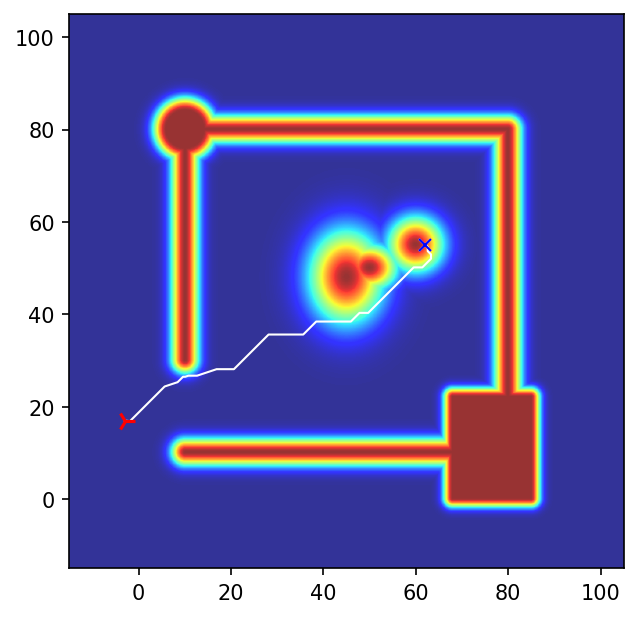

Highest potential: 0.8948361373667705
Distance traveled: 83.86753929727827
Total area under route: 15.868660253223178
Average area under route: 0.18921099135834737
Total area under route (scaled): 35.01243898773005
Average area under route (scaled): 0.41747306861626615


In [8]:
start = (-3, 17) # (x, y)
end = (62, 55)

route = routing_graph.find_route(start, end, scale_tranform=lambda x: 1/(1.0 - x + 1e-10), alg="A*")
print(f"Route found: {route is not None}")

route_path = larp.graph.RouteGraph.route_to_lines_collection(start, end, route, remapped=True)

plt.figure(dpi=150)
plt.imshow(display, cmap='jet', extent=field.get_extent(), alpha=0.8)
plt.plot(route_path[:, 0], route_path[:, 1], color="#fff", alpha=1.0, linewidth=1.0)
plt.plot(route_path[0, 0], route_path[0, 1], 'r4', markersize=10.0, markeredgewidth=1.5)
plt.plot(route_path[-1, 0], route_path[-1, 1], 'wx')
plt.plot(end[0], end[1], 'bx')
plt.show()

# Highest potential value
highest = field.eval(larp.interpolate_along_route(route_path, step=1e-4)).max()
print(f"Highest potential: {highest}")

# Distance traveled
dist = larp.route_distance(route_path)
print(f"Distance traveled: {dist}")

# Area under route
area = field.estimate_route_area(route_path, step=1e-4)
print(f"Total area under route: {area}")

# Average area under route
avg_area = area/dist
print(f"Average area under route: {avg_area}")

# Area under route (scaled to infinity via 1/(x-1))
area = field.estimate_route_area(route_path, step=1e-4, scale_transform=lambda x: 1/(1.0 - x + 1e-10)-1)
print(f"Total area under route (scaled): {area}")

# Average area under route (scaled to infinity via 1/(x-1))
avg_area = area/dist
print(f"Average area under route (scaled): {avg_area}")

Route found: True


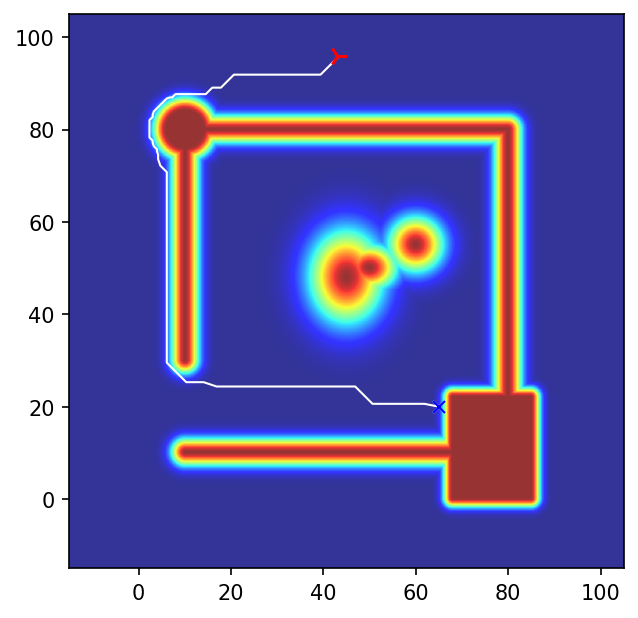

Highest potential: 0.3452908907550531
Distance traveled: 163.83822700041515
Total area under route: 14.876895100074538
Average area under route: 0.09080234431514474
Total area under route (scaled): 18.681871056340512
Average area under route (scaled): 0.1140263258359917


In [9]:
start = (43, 96) # (x, y)
end = (65, 20)

route = routing_graph.find_route(start, end, scale_tranform=lambda x: 1/(1.0 - x + 1e-10), alg="A*")
print(f"Route found: {route is not None}")

route_path = larp.graph.RouteGraph.route_to_lines_collection(start, end, route, remapped=True)

plt.figure(dpi=150)
plt.imshow(display, cmap='jet', extent=field.get_extent(), alpha=0.8)
plt.plot(route_path[:, 0], route_path[:, 1], color="#fff", alpha=1.0, linewidth=1.0)
plt.plot(route_path[0, 0], route_path[0, 1], 'r4', markersize=10.0, markeredgewidth=1.5)
plt.plot(route_path[-1, 0], route_path[-1, 1], 'wx')
plt.plot(end[0], end[1], 'bx')
plt.show()

# Highest potential value
highest = field.eval(larp.interpolate_along_route(route_path, step=1e-4)).max()
print(f"Highest potential: {highest}")

# Distance traveled
dist = larp.route_distance(route_path)
print(f"Distance traveled: {dist}")

# Area under route
area = field.estimate_route_area(route_path, step=1e-4)
print(f"Total area under route: {area}")

# Average area under route
avg_area = area/dist
print(f"Average area under route: {avg_area}")

# Area under route (scaled to infinity via 1/(x-1))
area = field.estimate_route_area(route_path, step=1e-4, scale_transform=lambda x: 1/(1.0 - x + 1e-10)-1)
print(f"Total area under route (scaled): {area}")

# Average area under route (scaled to infinity via 1/(x-1))
avg_area = area/dist
print(f"Average area under route (scaled): {avg_area}")